In [1]:
#default params

#input file paths
enhancers_metadata_path = "Analysis/enhancers/tcea_FANTOM/tcea_FANTOM_enhancers_metadata.txt"

In [17]:
library(ggplot2)
library(dplyr)
library(patchwork)


In [3]:
setwd(here::here()) # set working directory to project root
getwd()

[1] "/sci/labs/yotamd/lab_share/avishai.wizel/Projects/eRNA"

In [10]:
enhancers_metadata <- data.table::fread(enhancers_metadata_path, header = T, sep = "\t", data.table = FALSE)

In [11]:
head(enhancers_metadata)

  chr  start    end                      id type gene_intersection
1   1 905373 905830 FANTOM5_1:840753-841210    1        intergenic
2   1 910105 910298 FANTOM5_1:845485-845678    1        intergenic
3   1 921159 921377 FANTOM5_1:856539-856757    1        intergenic
4   1 922876 923268 FANTOM5_1:858256-858648    1        intergenic
5   1 933185 933304 FANTOM5_1:868565-868684    1          intronic
6   1 983069 983175 FANTOM5_1:918449-918555    1        intergenic
  bp_to_closest_gene length
1              18093    457
2              13625    193
3               2546    218
4                655    392
5                  0    119
6                953    106

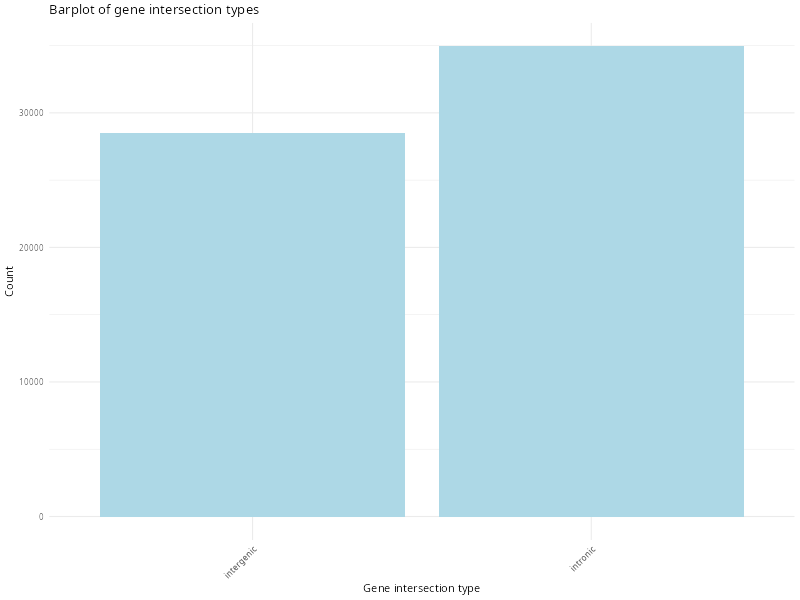

In [12]:
#barbplot of gene_intersection types
p = ggplot(enhancers_metadata, aes(x = gene_intersection)) +
  geom_bar(fill = "lightblue") +
  labs(title = "Barplot of gene intersection types", x = "Gene intersection type", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
p

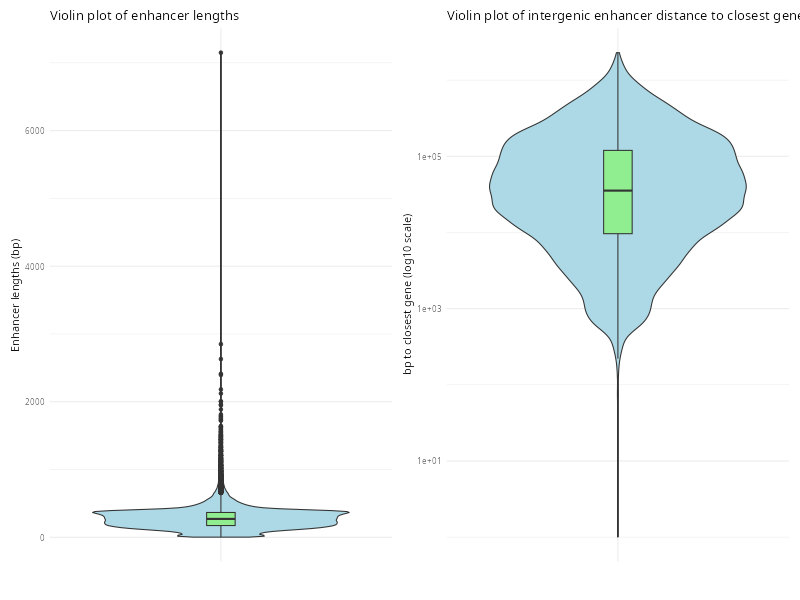

In [18]:
#violin plots of enhancer lengths 
p1 = ggplot(enhancers_metadata, aes(x = "", y = length)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  labs(title = "Violin plot of enhancer lengths", x = "", y = "Enhancer lengths (bp)") +
  theme_minimal()

#violin plots of enhancer distance to closest gene
p2 = ggplot(filter(enhancers_metadata,gene_intersection == "intergenic"), aes(x = "", y = bp_to_closest_gene)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen", outlier.shape = NA) +
  scale_y_log10() +  # Transform y-axis to log10 scale
  #ylim(NA, 10000) +   # Set maximum y-axis value to 1000
  labs(title = "Violin plot of intergenic enhancer distance to closest gene", x = "", y = "bp to closest gene (log10 scale)") +
  theme_minimal()
print(p1+p2)

In [20]:
quantile(enhancers_metadata$length)

  0%  25%  50%  75% 100% 
   2  173  271  366 7150 

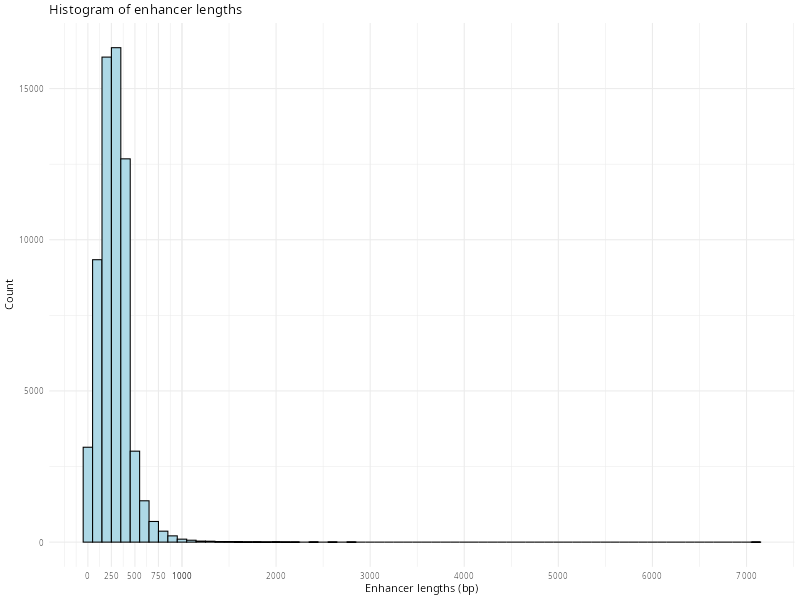

In [25]:
#binplot of enhancer lengths, add ticks at every 100 bp until 1000 bp and every 1000 bp until 10000 bp
ggplot(enhancers_metadata, aes(x = length)) +
  geom_histogram(binwidth = 100, fill = "lightblue", color = "black") +
  labs(title = "Histogram of enhancer lengths", x = "Enhancer lengths (bp)", y = "Count") +
  theme_minimal() +
  scale_x_continuous(breaks = c(seq(0, 1000, by = 250), seq(1000, 10000, by = 1000)))